In [1]:
import sys
sys.path.append('..')
from MPRA_predict.utils import *

In [2]:
df = pd.read_csv('../data/sysMPRA/Table 2.csv', index_col=0)
df

,seq_ID,enhancer_ID,enhancer_seq,barcode,full_oligo_seq,source,subSource,dnaDetect,rnaDetect
1,CS6000114723_mm10_chr6_1,CS6000114723_mm10_chr6,TCCCCATTCCAGTGATGCTTGTCAGCCGTGCTGTGGCTAACACAGT...,ATTCCTTTAGCTACAA,GCTAAGGGCCTAACTGGCCGCTTCACTGTCCCCATTCCAGTGATGC...,MEW,MEW,False,False
2,CS6000114723_taeGut2_chr12_1,CS6000114723_taeGut2_chr12,CTCCATCACGGCGAATTCCTGTCAGCTGCACTCTCGCTAACACAAT...,GCCTATTAACTCACTA,GCTAAGGGCCTAACTGGCCGCTTCACTGCTCCATCACGGCGAATTC...,MEW,MEW,False,False
3,CS6000114723_hg38_chr3_1,CS6000114723_hg38_chr3,CTCCATCACAGTGGACGCCTGTCAGCTGCACTCTTGCTAACACAAT...,ATATGTTTTATTTCCC,GCTAAGGGCCTAACTGGCCGCTTCACTGCTCCATCACAGTGGACGC...,MEW,MEW,False,False
4,CS6000114723_panTro4_chr3_1,CS6000114723_panTro4_chr3,CTCCATCACAGTGGACGCCTGTCAGCTGCACTCTTGCTAACACAAT...,ACGTAAATGGATATGA,GCTAAGGGCCTAACTGGCCGCTTCACTGCTCCATCACAGTGGACGC...,MEW,MEW,False,False
5,CS6000114723_Raegyp2_NW_015493843.1_1,CS6000114723_Raegyp2_NW_015493843.1,CTCCATCACAGTAGATTCTTGTCAGCTGCACTCTTGCTAACACAAT...,TCGTTGGGCTAGCTGC,GCTAAGGGCCTAACTGGCCGCTTCACTGCTCCATCACAGTAGATTC...,MEW,MEW,False,True
...,...,...,...,...,...,...,...,...,...
9216,GC70_06_20,GC70_06,CACGGAGCCGGCGGGCTAACCACGAGCGTCAGCCGGCGCCGAGGGG...,TGGACCTGGTGTAAAC,GCTAAGGGCCTAACTGGCCGCTTCACTGCACGGAGCCGGCGGGCTA...,GC,GC_70,True,True
9217,GC70_07_20,GC70_07,TGACGGGATGGGACGTGGTGCAGAACGCCAATAAATCGTGGCATGG...,TGCGATGTGGCGGCGG,GCTAAGGGCCTAACTGGCCGCTTCACTGTGACGGGATGGGACGTGG...,GC,GC_70,True,True
9218,GC70_08_20,GC70_08,CCAGTCCCGCGCAGGCGCTCCCGCCCGGCACGTAGGCCTCTCGCTA...,AGATGGTCTACGTGAC,GCTAAGGGCCTAACTGGCCGCTTCACTGCCAGTCCCGCGCAGGCGC...,GC,GC_70,True,True
9219,GC70_09_20,GC70_09,CTAGCGGCCGGGACCCTAGCATCTCGCTCCAGAGATCTAACGGCCC...,TGGTAAAGCACAACTG,GCTAAGGGCCTAACTGGCCGCTTCACTGCTAGCGGCCGGGACCCTA...,GC,GC_70,False,False


In [3]:
barcode_seq_dict = dict(zip(df['barcode'], df['full_oligo_seq']))

In [4]:
dna_counts = pd.read_csv('../data/sysMPRA/Table 4.csv', index_col=0)
dna_counts = dna_counts[sorted(dna_counts.columns)]
dna_counts

,Cortex_1_1,Cortex_2_1,Cortex_6_1,Cortex_7_1,Cortex_8_1,HMC3_C_2,HMC3_D_2,HMC3_E_2,Heart_9_2,Hippocampus_1_1,Hippocampus_2_1,Hippocampus_5_1,Hippocampus_6_1,Hippocampus_7_1,Hippocampus_8_1,Hypothalamus_10_2,Hypothalamus_9_2,Kidney_10_2,Kidney_9_2,Liver_10_2,Liver_7_1,Liver_8_1,Liver_9_2,Lung_10_2,M1_1_1,M1_2_1,M1_5_1,M1_6_1,M1_7_1,M1_8_1,Muscle_10_2,Ovaries_10_2,PFC_5_1,PFC_6_1,PFC_7_1,PFC_8_1,Striatum_1_1,Striatum_2_1,Striatum_5_1,Striatum_6_1,Striatum_7_1,Striatum_8_1,Testies_9_2
CTCCCGCAGTCCGCTG,3831,3115,5640,8674,6817,9467,4008,16685,6353,3264,3036,6416,3478,9284,7927,4094,4267,16204,8816,16490,9140,7564,15080,15198,4400,4039,7202,4864,7294,4876,6052,4328,10940,1910,5465,4946,3921,821,5467,4003,6331,5774,1443
CTACAGGACATACGTT,2470,1561,2971,5785,5623,9675,3716,41012,4446,2171,1948,3677,3203,3473,5224,5156,14044,3443,12048,1892,3399,4495,10577,3667,3155,2449,6717,5254,2687,6079,4,4966,3854,1669,3025,5580,2292,437,2467,2477,3907,4492,2951
TCAACTGTGCTCTAAC,573,546,1194,311,575,2039,806,5725,1,438,320,1982,1081,2603,1183,2876,20,935,911,2411,1883,1629,1599,43,232,748,1266,452,1173,1708,1,21,5046,1470,167,733,861,103,729,1204,401,719,736
CGTCAAGAGGTAGTGG,1840,1523,2412,4031,2535,6516,2337,49599,2870,1609,912,2190,1282,3187,4167,1702,781,2292,38,2126,3560,3392,1624,15,1640,2121,1261,1088,4434,4638,0,1353,2947,168,4842,2069,1917,302,1194,1954,3481,2506,3123
TTTGAGTCGTACAAGG,891,790,1839,1915,1919,3344,1207,12015,3563,986,690,2047,1326,931,584,2806,2095,2963,1636,1955,1727,479,1617,141,1321,527,1890,1738,1600,1073,0,51,349,1915,1717,2137,1144,194,2117,874,1155,1411,2180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGTATTTCGGGGTATC,6006,4551,7200,6525,11783,21545,7762,72561,6669,6243,5048,10265,5235,9402,7938,10151,5369,24535,22273,20222,14604,19337,24741,3405,6475,7127,8399,6847,11609,11193,4888,9072,18344,6869,10189,6312,5525,899,10166,4976,9388,7823,5942
TATGGCGATCTCTGCG,9205,7282,17498,16779,17721,21574,8839,13321,16525,8986,8022,13393,8133,15809,15907,8075,17494,32265,34574,34558,16574,23672,39579,14576,11835,10591,14876,9291,17562,22548,17432,21471,26978,10148,15742,17746,10706,1674,15415,12446,11562,14826,3907
TGGACCTGGTGTAAAC,900,975,1422,704,1072,3996,1241,26296,3783,1018,792,1294,841,2189,1057,5,3,500,17,7883,1988,54,2381,1403,775,1013,1757,2278,462,375,3,2371,941,28,1743,384,1047,145,1173,1117,428,1492,4298
TGCGATGTGGCGGCGG,766,595,1872,2138,1005,3359,1243,10696,3,411,482,1153,472,2151,1675,1320,9,8459,7430,2621,1494,54,2209,2820,844,883,617,1163,140,1961,0,46,825,34,87,2749,838,76,1334,813,957,1403,452


In [5]:
rna_counts = pd.read_csv('../data/sysMPRA/Table 5.csv', index_col=0)
rna_counts = rna_counts[sorted(rna_counts.columns)]
rna_counts

,Cortex_1_1,Cortex_1_2,Cortex_2_1,Cortex_2_2,Cortex_6_1,Cortex_7_1,Cortex_8_1,Cortex_8_2,HMC3_A_2,HMC3_B_2,HMC3_C_2,HMC3_E_2,Hippocampus_1_1,Hippocampus_2_1,Hippocampus_2_2,Hippocampus_5_1,Hippocampus_5_2,Hippocampus_6_1,Hippocampus_7_1,Hippocampus_8_1,Hypothalamus_10_2,Hypothalamus_9_2,Kidney_10_2,Kidney_9_2,Liver_10_2,Liver_7_1,Liver_7_2,Liver_8_1,Liver_8_2,Liver_9_2,Lung_10_2,M1_1_1,M1_2_1,M1_5_1,M1_6_1,M1_7_1,M1_8_1,Muscle_10_2,PFC_5_1,PFC_6_1,PFC_7_1,PFC_8_1,Striatum_1_1,Striatum_1_2,Striatum_2_1,Striatum_5_1,Striatum_5_2,Striatum_6_1,Striatum_7_1,Striatum_8_1
CTCCCGCAGTCCGCTG,12508,16973,347,30,3236,5265,12059,39,353,29024,47891,10316,12913,7227,7467,385,2,1274,7580,34540,52,46,7,4,274,12861,15925,507,92,263,50,26316,5875,330,10761,9905,9835,3,19016,162,405,6888,10904,8380,5922,495,12,686,44396,41371
CTACAGGACATACGTT,13440,19217,308,27,9170,13742,16490,57,441,28274,35735,13363,4171,7393,8350,214,2,317,17501,8420,21,51,0,2,168,8061,11300,273,94,300,31,9123,64,103,135,329,550,2,23,46,130,108,11496,9753,280,233,14,3310,17574,14194
TCAACTGTGCTCTAAC,3239,4830,90,6,58,226,189,39,100,3779,8960,2904,60,84,1,595,736,84,287,5014,2,4,0,0,182,728,46,58205,41869,206,5,209,1815,99,113,18729,409,0,85,149,305,23807,107,34,6537,76,3,3886,370,386
CGTCAAGAGGTAGTGG,7551,7572,130,7,1341,7479,222,22,242,18471,17922,8996,3385,1974,1249,6006,5086,129,506,211,7,23,0,3,72,190,15,44,45,147,39,195,35,83,3274,277,141,1,61,68,185,7853,11031,7737,229,250,18,870,32204,519
TTTGAGTCGTACAAGG,3085,3923,106,5,2476,7604,7585,10,107,8131,6033,4543,2830,3440,3753,55,0,85,238,275,4,12,0,0,82,13202,17407,212,51,156,10,121,35,38,70,132,4502,0,16,15,43,59,6486,5433,110,123,3,192,3526,13784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGTATTTCGGGGTATC,15223,20996,1677,1368,17801,32949,6012,70,558,38254,41769,30999,8824,3219,2265,5372,6711,580,46814,7517,43,40,3,2,357,18113,24313,345,189,481,2666,3473,96,190,222,744,6885,3,69,69,234,111,393,260,10886,275,33,343,9261,586
TATGGCGATCTCTGCG,10671,14721,1323,949,2349,38402,6898,85,481,40897,91757,20012,27113,22796,25493,880,78,1228,31485,55717,50,84,7,4,341,549,21,1084,673,454,133,5639,3396,448,567,21710,11272,4,14465,297,563,10520,32899,28109,11190,10749,11364,55451,35189,14728
TGGACCTGGTGTAAAC,3094,4115,96,3,1584,146,117,10,153,13520,9671,6594,2775,2845,2623,104,2,124,292,13545,5,16,0,1,139,16539,20654,160,50,170,16,291,17,13,27,45,67,0,67,112,7443,12513,84,61,6562,43,6,75,132,166
TGCGATGTGGCGGCGG,611,733,57,0,71,209,7537,5,58,6830,7503,5373,724,37,0,23,0,2750,172,203,5,7,1,2,69,55,5,93,12,66,4,5015,45,65,57,7907,269,0,10,15,35,46,134,36,51,39,4,90,205,9546


In [8]:
common_cols = sorted(set(dna_counts.columns) & set(rna_counts.columns))
only_dna = sorted(set(dna_counts.columns) - set(rna_counts.columns))
only_rna = sorted(set(rna_counts.columns) - set(dna_counts.columns))
print("DNA 和 RNA 共同存在：", common_cols)
print("仅 DNA 存在：", only_dna)
print("仅 RNA 存在：", only_rna)

DNA 和 RNA 共同存在： ['Cortex_1_1', 'Cortex_2_1', 'Cortex_6_1', 'Cortex_7_1', 'Cortex_8_1', 'HMC3_C_2', 'HMC3_E_2', 'Hippocampus_1_1', 'Hippocampus_2_1', 'Hippocampus_5_1', 'Hippocampus_6_1', 'Hippocampus_7_1', 'Hippocampus_8_1', 'Hypothalamus_10_2', 'Hypothalamus_9_2', 'Kidney_10_2', 'Kidney_9_2', 'Liver_10_2', 'Liver_7_1', 'Liver_8_1', 'Liver_9_2', 'Lung_10_2', 'M1_1_1', 'M1_2_1', 'M1_5_1', 'M1_6_1', 'M1_7_1', 'M1_8_1', 'Muscle_10_2', 'PFC_5_1', 'PFC_6_1', 'PFC_7_1', 'PFC_8_1', 'Striatum_1_1', 'Striatum_2_1', 'Striatum_5_1', 'Striatum_6_1', 'Striatum_7_1', 'Striatum_8_1']
仅 DNA 存在： ['HMC3_D_2', 'Heart_9_2', 'Ovaries_10_2', 'Testies_9_2']
仅 RNA 存在： ['Cortex_1_2', 'Cortex_2_2', 'Cortex_8_2', 'HMC3_A_2', 'HMC3_B_2', 'Hippocampus_2_2', 'Hippocampus_5_2', 'Liver_7_2', 'Liver_8_2', 'Striatum_1_2', 'Striatum_5_2']


In [6]:
dna_counts = dna_counts.mask(dna_counts < 10, np.nan)
rna_counts = rna_counts.mask(rna_counts < 10, np.nan)

In [9]:
pseudo_count = 10
activity = np.log2((rna_counts + pseudo_count) / (dna_counts + pseudo_count))
activity

,Cortex_1_1,Cortex_1_2,Cortex_2_1,Cortex_2_2,Cortex_6_1,Cortex_7_1,Cortex_8_1,Cortex_8_2,HMC3_A_2,HMC3_B_2,HMC3_C_2,HMC3_D_2,HMC3_E_2,Heart_9_2,Hippocampus_1_1,Hippocampus_2_1,Hippocampus_2_2,Hippocampus_5_1,Hippocampus_5_2,Hippocampus_6_1,Hippocampus_7_1,Hippocampus_8_1,Hypothalamus_10_2,Hypothalamus_9_2,Kidney_10_2,Kidney_9_2,Liver_10_2,Liver_7_1,Liver_7_2,Liver_8_1,Liver_8_2,Liver_9_2,Lung_10_2,M1_1_1,M1_2_1,M1_5_1,M1_6_1,M1_7_1,M1_8_1,Muscle_10_2,Ovaries_10_2,PFC_5_1,PFC_6_1,PFC_7_1,PFC_8_1,Striatum_1_1,Striatum_1_2,Striatum_2_1,Striatum_5_1,Striatum_5_2,Striatum_6_1,Striatum_7_1,Striatum_8_1,Testies_9_2
CTCCCGCAGTCCGCTG,1.704,NaN,-3.130,NaN,-0.800,-0.719,0.822,NaN,NaN,NaN,2.338,NaN,-0.693,NaN,1.981,1.248,NaN,-4.024,NaN,-1.442,-0.292,2.122,-6.049,-6.255,NaN,NaN,-5.860,0.492,NaN,-3.873,NaN,-5.789,-7.986,2.578,0.539,-4.407,1.144,0.441,1.011,NaN,NaN,0.797,-3.481,-3.722,0.477,1.473,NaN,2.836,-3.439,NaN,-2.528,2.808,2.839,NaN
CTACAGGACATACGTT,2.439,NaN,-2.305,NaN,1.623,1.247,1.550,NaN,NaN,NaN,1.884,NaN,-1.617,NaN,0.939,1.919,NaN,-4.041,NaN,-3.297,2.330,0.688,-7.381,-7.848,NaN,NaN,-3.418,1.243,NaN,-3.993,NaN,-5.094,-6.487,1.529,-5.054,-5.896,-5.182,-2.992,-3.443,NaN,NaN,-6.871,-4.906,-4.438,-5.566,2.321,NaN,-0.624,-3.350,NaN,0.417,2.166,1.658,NaN
TCAACTGTGCTCTAAC,2.478,NaN,-2.475,NaN,-4.146,-0.444,-1.556,NaN,NaN,NaN,2.130,NaN,-0.977,NaN,-2.678,-1.812,NaN,-1.719,NaN,-3.537,-3.137,2.074,NaN,NaN,NaN,NaN,-3.656,-1.359,NaN,5.151,NaN,-2.897,NaN,-0.144,1.268,-3.549,-1.909,3.986,-2.036,NaN,NaN,-5.734,-3.218,0.832,5.002,-2.896,NaN,5.856,-3.103,NaN,1.682,-0.113,-0.880,NaN
CGTCAAGAGGTAGTGG,2.031,NaN,-3.453,NaN,-0.842,0.890,-3.455,NaN,NaN,NaN,1.458,NaN,-2.462,NaN,1.068,1.106,NaN,1.451,NaN,-3.216,-2.631,-4.240,NaN,-4.583,NaN,NaN,-4.703,-4.158,NaN,-5.977,NaN,-3.380,0.971,-3.009,-5.565,-3.773,1.581,-3.953,-4.944,NaN,NaN,-5.380,-1.190,-4.637,1.919,2.518,NaN,-0.385,-2.211,NaN,-1.158,3.206,-2.250,NaN
TTTGAGTCGTACAAGG,1.780,NaN,-2.786,NaN,0.427,1.984,1.977,NaN,NaN,NaN,0.849,NaN,-1.401,NaN,1.512,2.301,NaN,-4.984,NaN,-3.814,-1.924,-1.060,NaN,-6.580,NaN,NaN,-4.417,2.927,NaN,-1.139,NaN,-3.293,-2.916,-3.345,-3.577,-5.307,-4.450,-3.503,2.059,NaN,NaN,-3.787,-6.267,-5.026,-4.960,2.493,NaN,-0.766,-3.999,NaN,-2.130,1.602,3.279,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGTATTTCGGGGTATC,1.340,NaN,-1.435,NaN,1.305,2.334,-0.970,NaN,NaN,NaN,0.955,NaN,-1.227,NaN,0.499,-0.647,NaN,-0.933,NaN,-3.152,2.315,-0.079,-7.583,-6.749,NaN,NaN,-5.785,0.310,NaN,-5.768,NaN,-5.656,-0.352,-0.897,-6.073,-5.394,-4.885,-3.946,-0.700,NaN,NaN,-7.860,-6.444,-5.385,-5.707,-3.780,NaN,3.583,-5.158,NaN,-3.820,-0.020,-3.716,NaN
TATGGCGATCTCTGCG,0.213,NaN,-2.452,NaN,-2.892,1.194,-1.360,NaN,NaN,NaN,2.088,NaN,0.587,NaN,1.592,1.506,NaN,-3.913,NaN,-2.718,0.993,1.808,-7.074,-7.541,NaN,NaN,-6.622,-4.891,NaN,-4.436,NaN,-6.415,-6.672,-1.068,-1.638,-5.022,-4.011,0.306,-1.000,NaN,NaN,-0.899,-5.048,-4.781,-0.754,1.619,NaN,2.734,-0.520,NaN,2.155,1.605,-0.010,NaN
TGGACCTGGTGTAAAC,1.770,NaN,-3.216,NaN,0.155,-2.194,-3.091,NaN,NaN,NaN,1.273,NaN,-1.994,NaN,1.438,1.832,NaN,-3.516,NaN,-2.667,-2.864,3.667,NaN,NaN,NaN,NaN,-5.727,3.050,NaN,1.409,NaN,-3.732,-5.764,-1.383,-5.244,-6.264,-5.950,-3.101,-2.322,NaN,NaN,-3.627,1.683,2.088,4.990,-3.491,NaN,5.406,-4.480,NaN,-3.729,-1.625,-3.093,NaN
TGCGATGTGGCGGCGG,-0.321,NaN,-3.175,NaN,-4.538,-3.294,2.894,NaN,NaN,NaN,1.157,NaN,-0.992,NaN,0.802,-3.388,NaN,-5.139,NaN,2.518,-3.570,-2.984,NaN,NaN,NaN,NaN,-5.058,-4.532,NaN,0.687,NaN,-4.868,NaN,2.557,-4.021,-3.064,-4.130,5.722,-2.821,NaN,NaN,-5.384,-0.816,-1.108,-5.623,-2.558,NaN,-0.496,-4.778,NaN,-3.041,-2.169,2.758,NaN


In [10]:
activity = activity.dropna(axis=1, how="all")
activity

,Cortex_1_1,Cortex_2_1,Cortex_6_1,Cortex_7_1,Cortex_8_1,HMC3_C_2,HMC3_E_2,Hippocampus_1_1,Hippocampus_2_1,Hippocampus_5_1,Hippocampus_6_1,Hippocampus_7_1,Hippocampus_8_1,Hypothalamus_10_2,Hypothalamus_9_2,Kidney_10_2,Kidney_9_2,Liver_10_2,Liver_7_1,Liver_8_1,Liver_9_2,Lung_10_2,M1_1_1,M1_2_1,M1_5_1,M1_6_1,M1_7_1,M1_8_1,Muscle_10_2,PFC_5_1,PFC_6_1,PFC_7_1,PFC_8_1,Striatum_1_1,Striatum_2_1,Striatum_5_1,Striatum_6_1,Striatum_7_1,Striatum_8_1
CTCCCGCAGTCCGCTG,1.704,-3.130,-0.800,-0.719,0.822,2.338,-0.693,1.981,1.248,-4.024,-1.442,-0.292,2.122,-6.049,-6.255,NaN,NaN,-5.860,0.492,-3.873,-5.789,-7.986,2.578,0.539,-4.407,1.144,0.441,1.011,NaN,0.797,-3.481,-3.722,0.477,1.473,2.836,-3.439,-2.528,2.808,2.839
CTACAGGACATACGTT,2.439,-2.305,1.623,1.247,1.550,1.884,-1.617,0.939,1.919,-4.041,-3.297,2.330,0.688,-7.381,-7.848,NaN,NaN,-3.418,1.243,-3.993,-5.094,-6.487,1.529,-5.054,-5.896,-5.182,-2.992,-3.443,NaN,-6.871,-4.906,-4.438,-5.566,2.321,-0.624,-3.350,0.417,2.166,1.658
TCAACTGTGCTCTAAC,2.478,-2.475,-4.146,-0.444,-1.556,2.130,-0.977,-2.678,-1.812,-1.719,-3.537,-3.137,2.074,NaN,NaN,NaN,NaN,-3.656,-1.359,5.151,-2.897,NaN,-0.144,1.268,-3.549,-1.909,3.986,-2.036,NaN,-5.734,-3.218,0.832,5.002,-2.896,5.856,-3.103,1.682,-0.113,-0.880
CGTCAAGAGGTAGTGG,2.031,-3.453,-0.842,0.890,-3.455,1.458,-2.462,1.068,1.106,1.451,-3.216,-2.631,-4.240,NaN,-4.583,NaN,NaN,-4.703,-4.158,-5.977,-3.380,0.971,-3.009,-5.565,-3.773,1.581,-3.953,-4.944,NaN,-5.380,-1.190,-4.637,1.919,2.518,-0.385,-2.211,-1.158,3.206,-2.250
TTTGAGTCGTACAAGG,1.780,-2.786,0.427,1.984,1.977,0.849,-1.401,1.512,2.301,-4.984,-3.814,-1.924,-1.060,NaN,-6.580,NaN,NaN,-4.417,2.927,-1.139,-3.293,-2.916,-3.345,-3.577,-5.307,-4.450,-3.503,2.059,NaN,-3.787,-6.267,-5.026,-4.960,2.493,-0.766,-3.999,-2.130,1.602,3.279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGTATTTCGGGGTATC,1.340,-1.435,1.305,2.334,-0.970,0.955,-1.227,0.499,-0.647,-0.933,-3.152,2.315,-0.079,-7.583,-6.749,NaN,NaN,-5.785,0.310,-5.768,-5.656,-0.352,-0.897,-6.073,-5.394,-4.885,-3.946,-0.700,NaN,-7.860,-6.444,-5.385,-5.707,-3.780,3.583,-5.158,-3.820,-0.020,-3.716
TATGGCGATCTCTGCG,0.213,-2.452,-2.892,1.194,-1.360,2.088,0.587,1.592,1.506,-3.913,-2.718,0.993,1.808,-7.074,-7.541,NaN,NaN,-6.622,-4.891,-4.436,-6.415,-6.672,-1.068,-1.638,-5.022,-4.011,0.306,-1.000,NaN,-0.899,-5.048,-4.781,-0.754,1.619,2.734,-0.520,2.155,1.605,-0.010
TGGACCTGGTGTAAAC,1.770,-3.216,0.155,-2.194,-3.091,1.273,-1.994,1.438,1.832,-3.516,-2.667,-2.864,3.667,NaN,NaN,NaN,NaN,-5.727,3.050,1.409,-3.732,-5.764,-1.383,-5.244,-6.264,-5.950,-3.101,-2.322,NaN,-3.627,1.683,2.088,4.990,-3.491,5.406,-4.480,-3.729,-1.625,-3.093
TGCGATGTGGCGGCGG,-0.321,-3.175,-4.538,-3.294,2.894,1.157,-0.992,0.802,-3.388,-5.139,2.518,-3.570,-2.984,NaN,NaN,NaN,NaN,-5.058,-4.532,0.687,-4.868,NaN,2.557,-4.021,-3.064,-4.130,5.722,-2.821,NaN,-5.384,-0.816,-1.108,-5.623,-2.558,-0.496,-4.778,-3.041,-2.169,2.758


In [11]:
print(activity.corr(method='pearson'))

                   Cortex_1_1  Cortex_2_1  Cortex_6_1  Cortex_7_1  Cortex_8_1  HMC3_C_2  HMC3_E_2  Hippocampus_1_1  Hippocampus_2_1  Hippocampus_5_1  Hippocampus_6_1  Hippocampus_7_1  Hippocampus_8_1  Hypothalamus_10_2  Hypothalamus_9_2  Kidney_10_2  Kidney_9_2  Liver_10_2  Liver_7_1  Liver_8_1  Liver_9_2  Lung_10_2  M1_1_1  M1_2_1  M1_5_1  M1_6_1  M1_7_1  M1_8_1  Muscle_10_2  PFC_5_1  PFC_6_1  PFC_7_1  PFC_8_1  Striatum_1_1  Striatum_2_1  Striatum_5_1  Striatum_6_1  Striatum_7_1  Striatum_8_1
Cortex_1_1              1.000       0.157       0.176       0.160       0.174     0.036    -0.323            0.142            0.162            0.197            0.123            0.119            0.162              0.037             0.023       -0.024       0.021       0.036      0.073      0.059      0.063      0.064   0.142   0.135   0.093   0.089   0.114   0.116       -0.141    0.045    0.074    0.071    0.109         0.129         0.140         0.105         0.148         0.166         0.153
Co

In [10]:
activity = activity.reset_index(names='barcode')
activity['seq'] = [barcode_seq_dict[i] for i in activity['barcode']]
activity

,barcode,Cortex_1_1,Cortex_2_1,Cortex_6_1,Cortex_7_1,Cortex_8_1,HMC3_C_2,HMC3_E_2,Hippocampus_1_1,Hippocampus_2_1,Hippocampus_5_1,Hippocampus_6_1,Hippocampus_7_1,Hippocampus_8_1,Hypothalamus_10_2,Hypothalamus_9_2,Kidney_10_2,Kidney_9_2,Liver_10_2,Liver_7_1,Liver_8_1,Liver_9_2,Lung_10_2,M1_1_1,M1_2_1,M1_5_1,M1_6_1,M1_7_1,M1_8_1,Muscle_10_2,PFC_5_1,PFC_6_1,PFC_7_1,PFC_8_1,Striatum_1_1,Striatum_2_1,Striatum_5_1,Striatum_6_1,Striatum_7_1,Striatum_8_1,seq
0,CTCCCGCAGTCCGCTG,1.704,-3.130,-0.800,-0.719,0.822,2.338,-0.693,1.981,1.248,-4.024,-1.442,-0.292,2.122,-6.049,-6.255,NaN,NaN,-5.860,0.492,-3.873,-5.789,-7.986,2.578,0.539,-4.407,1.144,0.441,1.011,NaN,0.797,-3.481,-3.722,0.477,1.473,2.836,-3.439,-2.528,2.808,2.839,GCTAAGGGCCTAACTGGCCGCTTCACTGTAGAGGGCACTGTGGTAT...
1,CTACAGGACATACGTT,2.439,-2.305,1.623,1.247,1.550,1.884,-1.617,0.939,1.919,-4.041,-3.297,2.330,0.688,-7.381,-7.848,NaN,NaN,-3.418,1.243,-3.993,-5.094,-6.487,1.529,-5.054,-5.896,-5.182,-2.992,-3.443,NaN,-6.871,-4.906,-4.438,-5.566,2.321,-0.624,-3.350,0.417,2.166,1.658,GCTAAGGGCCTAACTGGCCGCTTCACTGTAATTTGTCATGCACACT...
2,TCAACTGTGCTCTAAC,2.478,-2.475,-4.146,-0.444,-1.556,2.130,-0.977,-2.678,-1.812,-1.719,-3.537,-3.137,2.074,NaN,NaN,NaN,NaN,-3.656,-1.359,5.151,-2.897,NaN,-0.144,1.268,-3.549,-1.909,3.986,-2.036,NaN,-5.734,-3.218,0.832,5.002,-2.896,5.856,-3.103,1.682,-0.113,-0.880,GCTAAGGGCCTAACTGGCCGCTTCACTGTAAATCCTGGTGCATTCT...
3,CGTCAAGAGGTAGTGG,2.031,-3.453,-0.842,0.890,-3.455,1.458,-2.462,1.068,1.106,1.451,-3.216,-2.631,-4.240,NaN,-4.583,NaN,NaN,-4.703,-4.158,-5.977,-3.380,0.971,-3.009,-5.565,-3.773,1.581,-3.953,-4.944,NaN,-5.380,-1.190,-4.637,1.919,2.518,-0.385,-2.211,-1.158,3.206,-2.250,GCTAAGGGCCTAACTGGCCGCTTCACTGTAATTTGTCATGCACACT...
4,TTTGAGTCGTACAAGG,1.780,-2.786,0.427,1.984,1.977,0.849,-1.401,1.512,2.301,-4.984,-3.814,-1.924,-1.060,NaN,-6.580,NaN,NaN,-4.417,2.927,-1.139,-3.293,-2.916,-3.345,-3.577,-5.307,-4.450,-3.503,2.059,NaN,-3.787,-6.267,-5.026,-4.960,2.493,-0.766,-3.999,-2.130,1.602,3.279,GCTAAGGGCCTAACTGGCCGCTTCACTGTAATTTGTCATGCACACT...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,AGTATTTCGGGGTATC,1.340,-1.435,1.305,2.334,-0.970,0.955,-1.227,0.499,-0.647,-0.933,-3.152,2.315,-0.079,-7.583,-6.749,NaN,NaN,-5.785,0.310,-5.768,-5.656,-0.352,-0.897,-6.073,-5.394,-4.885,-3.946,-0.700,NaN,-7.860,-6.444,-5.385,-5.707,-3.780,3.583,-5.158,-3.820,-0.020,-3.716,GCTAAGGGCCTAACTGGCCGCTTCACTGTCAATAGCAGACTGTCCT...
3979,TATGGCGATCTCTGCG,0.213,-2.452,-2.892,1.194,-1.360,2.088,0.587,1.592,1.506,-3.913,-2.718,0.993,1.808,-7.074,-7.541,NaN,NaN,-6.622,-4.891,-4.436,-6.415,-6.672,-1.068,-1.638,-5.022,-4.011,0.306,-1.000,NaN,-0.899,-5.048,-4.781,-0.754,1.619,2.734,-0.520,2.155,1.605,-0.010,GCTAAGGGCCTAACTGGCCGCTTCACTGGTGGTAATGGCCTACGCT...
3980,TGGACCTGGTGTAAAC,1.770,-3.216,0.155,-2.194,-3.091,1.273,-1.994,1.438,1.832,-3.516,-2.667,-2.864,3.667,NaN,NaN,NaN,NaN,-5.727,3.050,1.409,-3.732,-5.764,-1.383,-5.244,-6.264,-5.950,-3.101,-2.322,NaN,-3.627,1.683,2.088,4.990,-3.491,5.406,-4.480,-3.729,-1.625,-3.093,GCTAAGGGCCTAACTGGCCGCTTCACTGCACGGAGCCGGCGGGCTA...
3981,TGCGATGTGGCGGCGG,-0.321,-3.175,-4.538,-3.294,2.894,1.157,-0.992,0.802,-3.388,-5.139,2.518,-3.570,-2.984,NaN,NaN,NaN,NaN,-5.058,-4.532,0.687,-4.868,NaN,2.557,-4.021,-3.064,-4.130,5.722,-2.821,NaN,-5.384,-0.816,-1.108,-5.623,-2.558,-0.496,-4.778,-3.041,-2.169,2.758,GCTAAGGGCCTAACTGGCCGCTTCACTGTGACGGGATGGGACGTGG...


In [11]:
activity_2 = activity.groupby("seq", as_index=False).mean(numeric_only=True)
activity_2

,seq,Cortex_1_1,Cortex_2_1,Cortex_6_1,Cortex_7_1,Cortex_8_1,HMC3_C_2,HMC3_E_2,Hippocampus_1_1,Hippocampus_2_1,Hippocampus_5_1,Hippocampus_6_1,Hippocampus_7_1,Hippocampus_8_1,Hypothalamus_10_2,Hypothalamus_9_2,Kidney_10_2,Kidney_9_2,Liver_10_2,Liver_7_1,Liver_8_1,Liver_9_2,Lung_10_2,M1_1_1,M1_2_1,M1_5_1,M1_6_1,M1_7_1,M1_8_1,Muscle_10_2,PFC_5_1,PFC_6_1,PFC_7_1,PFC_8_1,Striatum_1_1,Striatum_2_1,Striatum_5_1,Striatum_6_1,Striatum_7_1,Striatum_8_1
0,GCTAAGGGCCTAACTGGCCGCTTCACTGAAAATCAACACTGAGGTG...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GCTAAGGGCCTAACTGGCCGCTTCACTGAAAATCAACACTGAGGTG...,1.184,-1.491,-1.877,1.524,1.012,1.755,-0.729,1.037,-0.492,-2.584,-2.642,1.130,-3.023,1.761,-6.983,NaN,NaN,-5.544,0.949,1.338,-5.223,-6.424,0.580,0.159,-4.768,0.871,1.775,0.453,NaN,0.183,-4.968,-3.759,-5.866,2.511,2.064,-4.115,2.400,-1.105,-2.704
2,GCTAAGGGCCTAACTGGCCGCTTCACTGAAAATCAACACTGAGGTG...,1.758,-4.579,-4.456,-4.441,-4.708,1.934,-0.851,-3.403,-3.772,-4.667,-3.634,-3.124,2.609,NaN,-4.851,NaN,NaN,-2.296,2.853,-3.268,3.425,NaN,-4.871,NaN,-5.155,-0.893,-4.847,-3.460,NaN,-3.233,-3.614,2.261,-3.959,-3.726,-2.271,-6.088,-4.905,-4.625,-4.375
3,GCTAAGGGCCTAACTGGCCGCTTCACTGAAAATCAACACTGAGGTG...,NaN,NaN,NaN,NaN,NaN,NaN,-0.508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GCTAAGGGCCTAACTGGCCGCTTCACTGAAAATCAACACTGAGGTG...,0.686,-0.067,0.855,0.025,-3.635,2.134,-0.395,-0.186,0.966,-5.105,-2.197,-2.521,2.207,-8.385,-5.621,NaN,NaN,-5.961,-5.692,-4.643,0.966,-5.886,1.819,-2.084,-4.938,1.207,0.051,0.446,NaN,-6.658,-4.980,-0.338,-4.905,1.661,-1.120,-4.187,1.031,-1.748,1.476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,GCTAAGGGCCTAACTGGCCGCTTCACTGttctgttttcccatctct...,1.554,-1.760,0.033,-0.002,-0.309,1.683,-1.225,1.797,1.799,-4.041,1.131,1.182,-3.033,1.853,-6.725,NaN,NaN,-5.672,-0.648,2.193,-4.967,-0.089,-0.034,-1.658,-5.028,1.706,0.361,-0.241,2.575,0.241,-3.983,-3.902,0.390,1.972,2.161,-4.295,0.758,1.621,-3.169
3979,GCTAAGGGCCTAACTGGCCGCTTCACTGttctgttttcccatctct...,2.051,-0.658,-4.406,0.087,-3.100,1.971,-1.402,1.662,0.784,-4.569,-2.969,1.212,2.197,-6.345,-5.669,NaN,NaN,-5.288,-3.555,-4.995,2.012,-7.684,-3.540,-1.019,-4.921,-4.671,1.857,-0.712,NaN,-7.446,-6.984,-4.770,-6.150,1.019,-1.373,-4.209,-1.813,1.557,1.948
3980,GCTAAGGGCCTAACTGGCCGCTTCACTGttctgttttcccatctct...,0.695,-2.958,-0.487,2.312,-3.485,1.788,-1.856,-2.187,1.063,-1.536,2.043,1.361,2.068,-7.144,-6.897,NaN,NaN,-5.198,-5.566,-5.220,-5.225,-5.648,1.182,-0.986,-5.804,-4.155,-3.254,-2.923,NaN,-6.531,-4.934,-2.960,5.590,-3.215,2.755,-4.940,-3.203,-2.784,1.736
3981,GCTAAGGGCCTAACTGGCCGCTTCACTGttctgttttcccatctct...,1.828,-1.279,0.282,1.199,0.499,1.517,-1.187,2.691,1.806,-1.773,1.247,2.740,1.883,-8.040,-6.545,NaN,NaN,-5.420,0.950,-4.974,-5.574,-5.403,-0.312,-0.890,-4.896,1.856,1.455,0.965,NaN,-7.083,-5.157,0.731,0.600,2.446,4.238,-4.423,0.233,1.145,0.738


In [12]:
import numpy as np
df = pd.DataFrame({
    "seq": ["AAA", "AAA", "BBB", "CCC", "CCC"],
    "Cortex": [1.2, np.nan, 3.4, 2.2, 2.8],
    "Liver":  [5.0, 6.0, np.nan, 4.1, 4.3]
})

df_grouped = df.groupby("seq", as_index=False).mean(numeric_only=True)
print(df_grouped)


   seq  Cortex  Liver
0  AAA   1.200  5.500
1  BBB   3.400    NaN
2  CCC   2.500  4.200


In [39]:
# dna_counts = dna_counts / dna_counts.sum(axis=0) * 100000
# rna_counts = rna_counts / rna_counts.sum(axis=0) * 100000

In [40]:
print(dna_counts.corr(method='pearson'))

                   Cortex_1_1  Cortex_2_1  Cortex_6_1  Cortex_7_1  Cortex_8_1  HMC3_C_2  HMC3_D_2  HMC3_E_2  Heart_9_2  Hippocampus_1_1  Hippocampus_2_1  Hippocampus_5_1  Hippocampus_6_1  Hippocampus_7_1  Hippocampus_8_1  Hypothalamus_10_2  Hypothalamus_9_2  Kidney_10_2  Kidney_9_2  Liver_10_2  Liver_7_1  Liver_8_1  Liver_9_2  Lung_10_2  M1_1_1  M1_2_1  M1_5_1  M1_6_1  M1_7_1  M1_8_1  Muscle_10_2  Ovaries_10_2  PFC_5_1  PFC_6_1  PFC_7_1  PFC_8_1  Striatum_1_1  Striatum_2_1  Striatum_5_1  Striatum_6_1  Striatum_7_1  Striatum_8_1  Testies_9_2
Cortex_1_1              1.000       0.994       0.978       0.960       0.975     0.969     0.973     0.814      0.721            0.985            0.981            0.971            0.967            0.934            0.946              0.818             0.814        0.882       0.821       0.857      0.953      0.922      0.930      0.697   0.975   0.976   0.951   0.948   0.945   0.954        0.533         0.767    0.918    0.837    0.890    0.921    

In [41]:
print(rna_counts.corr(method='pearson'))

                   Cortex_1_1  Cortex_1_2  Cortex_2_1  Cortex_2_2  Cortex_6_1  Cortex_7_1  Cortex_8_1  Cortex_8_2  HMC3_A_2  HMC3_B_2  HMC3_C_2  HMC3_E_2  Hippocampus_1_1  Hippocampus_2_1  Hippocampus_2_2  Hippocampus_5_1  Hippocampus_5_2  Hippocampus_6_1  Hippocampus_7_1  Hippocampus_8_1  Hypothalamus_10_2  Hypothalamus_9_2  Kidney_10_2  Kidney_9_2  Liver_10_2  Liver_7_1  Liver_7_2  Liver_8_1  Liver_8_2  Liver_9_2  Lung_10_2  M1_1_1  M1_2_1  M1_5_1  M1_6_1  M1_7_1  M1_8_1  Muscle_10_2  PFC_5_1  PFC_6_1  PFC_7_1  PFC_8_1  Striatum_1_1  Striatum_1_2  Striatum_2_1  Striatum_5_1  Striatum_5_2  Striatum_6_1  Striatum_7_1  Striatum_8_1
Cortex_1_1              1.000       0.986       0.670       0.418       0.778       0.709       0.611       0.932     0.968     0.880     0.843     0.864            0.810            0.777            0.713            0.654            0.522            0.618            0.648            0.724              0.306             0.097       -0.252      -0.123       0.2

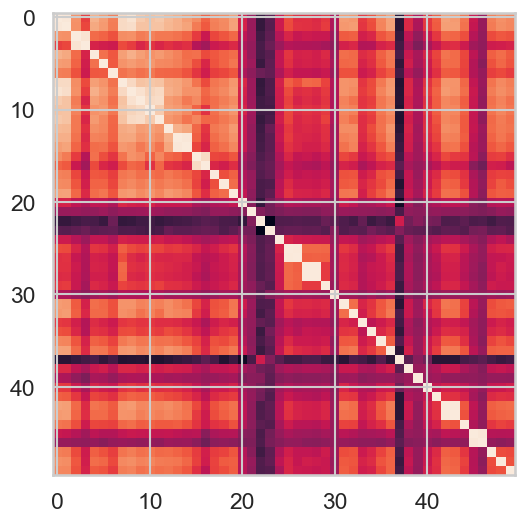

In [42]:
plt.imshow(rna_counts.corr(method='pearson'))

In [43]:
print(activity.corr(method='pearson'))

                   Cortex_1_1  Cortex_1_2  Cortex_2_1  Cortex_2_2  Cortex_6_1  Cortex_7_1  Cortex_8_1  Cortex_8_2  HMC3_A_2  HMC3_B_2  HMC3_C_2  HMC3_D_2  HMC3_E_2  Heart_9_2  Hippocampus_1_1  Hippocampus_2_1  Hippocampus_2_2  Hippocampus_5_1  Hippocampus_5_2  Hippocampus_6_1  Hippocampus_7_1  Hippocampus_8_1  Hypothalamus_10_2  Hypothalamus_9_2  Kidney_10_2  Kidney_9_2  Liver_10_2  Liver_7_1  Liver_7_2  Liver_8_1  Liver_8_2  Liver_9_2  Lung_10_2  M1_1_1  M1_2_1  M1_5_1  M1_6_1  M1_7_1  M1_8_1  Muscle_10_2  Ovaries_10_2  PFC_5_1  PFC_6_1  PFC_7_1  PFC_8_1  Striatum_1_1  Striatum_1_2  Striatum_2_1  Striatum_5_1  Striatum_5_2  Striatum_6_1  Striatum_7_1  Striatum_8_1  Testies_9_2
Cortex_1_1              1.000         NaN       0.157         NaN       0.176       0.160       0.174         NaN       NaN       NaN     0.036       NaN    -0.323        NaN            0.142            0.162              NaN            0.197              NaN            0.123            0.119            0.162   

In [11]:
tissues = ['Cortex', 'HMC3', 'Hippocampus', 'Kidney', 'Liver', 'Lung', 'M1', 'Muscle', 'PFC', 'Striatum']

In [12]:
cols = activity.columns
for tissue in tissues:
    cols_1 = [col for col in cols if tissue in col]
    activity[tissue] = activity[cols_1].mean(axis=1)

activity = activity[tissues]
activity

/tmp/ipykernel_40169/3683357882.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity[tissue] = activity[cols_1].mean(axis=1)
/tmp/ipykernel_40169/3683357882.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity[tissue] = activity[cols_1].mean(axis=1)
/tmp/ipykernel_40169/3683357882.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,Cortex,HMC3,Hippocampus,Kidney,Liver,Lung,M1,Muscle,PFC,Striatum
CTCCCGCAGTCCGCTG,-0.599,0.688,-0.818,-4.592,-2.798,-4.141,0.393,-5.349,-0.299,-0.175
CTACAGGACATACGTT,0.693,0.036,-0.909,-4.226,-1.840,-2.705,-2.778,0.065,-3.152,-0.388
TCAACTGTGCTCTAAC,-0.876,0.401,-1.553,-1.852,0.141,0.281,-0.004,-0.011,0.511,-0.298
CGTCAAGAGGTAGTGG,-0.960,-0.570,-1.343,-1.451,-2.614,2.495,-2.286,0.054,-0.826,-0.719
TTTGAGTCGTACAAGG,0.455,-0.318,-1.470,-2.861,-0.473,0.060,-1.939,0.000,-2.522,-0.525
...,...,...,...,...,...,...,...,...,...,...
AGTATTTCGGGGTATC,0.313,-0.226,-1.048,-5.800,-3.322,3.528,-3.143,-5.048,-4.318,-2.644
TATGGCGATCTCTGCG,-1.229,1.178,-0.883,-6.045,-4.621,-2.788,-1.837,-6.806,-1.670,0.363
TGGACCTGGTGTAAAC,-0.975,-0.418,-0.768,-0.645,-0.566,-2.104,-2.366,-0.031,2.122,-1.535
TGCGATGTGGCGGCGG,-1.250,-0.007,-1.724,-4.418,-1.676,-4.108,-0.462,0.000,-1.228,-1.591


In [13]:
activity = activity.reset_index(names='barcode')
activity['seq'] = [barcode_seq_dict[i] for i in activity['barcode']]
activity

In [15]:
activity['seq'] = [barcode_seq_dict[i] for i in activity['barcode']]
activity

,barcode,Cortex,HMC3,Hippocampus,Kidney,Liver,Lung,M1,Muscle,PFC,Striatum,seq
0,CTCCCGCAGTCCGCTG,-0.599,0.688,-0.818,-4.592,-2.798,-4.141,0.393,-5.349,-0.299,-0.175,GCTAAGGGCCTAACTGGCCGCTTCACTGTAGAGGGCACTGTGGTAT...
1,CTACAGGACATACGTT,0.693,0.036,-0.909,-4.226,-1.840,-2.705,-2.778,0.065,-3.152,-0.388,GCTAAGGGCCTAACTGGCCGCTTCACTGTAATTTGTCATGCACACT...
2,TCAACTGTGCTCTAAC,-0.876,0.401,-1.553,-1.852,0.141,0.281,-0.004,-0.011,0.511,-0.298,GCTAAGGGCCTAACTGGCCGCTTCACTGTAAATCCTGGTGCATTCT...
3,CGTCAAGAGGTAGTGG,-0.960,-0.570,-1.343,-1.451,-2.614,2.495,-2.286,0.054,-0.826,-0.719,GCTAAGGGCCTAACTGGCCGCTTCACTGTAATTTGTCATGCACACT...
4,TTTGAGTCGTACAAGG,0.455,-0.318,-1.470,-2.861,-0.473,0.060,-1.939,0.000,-2.522,-0.525,GCTAAGGGCCTAACTGGCCGCTTCACTGTAATTTGTCATGCACACT...
...,...,...,...,...,...,...,...,...,...,...,...,...
3978,AGTATTTCGGGGTATC,0.313,-0.226,-1.048,-5.800,-3.322,3.528,-3.143,-5.048,-4.318,-2.644,GCTAAGGGCCTAACTGGCCGCTTCACTGTCAATAGCAGACTGTCCT...
3979,TATGGCGATCTCTGCG,-1.229,1.178,-0.883,-6.045,-4.621,-2.788,-1.837,-6.806,-1.670,0.363,GCTAAGGGCCTAACTGGCCGCTTCACTGGTGGTAATGGCCTACGCT...
3980,TGGACCTGGTGTAAAC,-0.975,-0.418,-0.768,-0.645,-0.566,-2.104,-2.366,-0.031,2.122,-1.535,GCTAAGGGCCTAACTGGCCGCTTCACTGCACGGAGCCGGCGGGCTA...
3981,TGCGATGTGGCGGCGG,-1.250,-0.007,-1.724,-4.418,-1.676,-4.108,-0.462,0.000,-1.228,-1.591,GCTAAGGGCCTAACTGGCCGCTTCACTGTGACGGGATGGGACGTGG...


In [16]:
activity.to_csv('../data/sysMPRA/sysMPRA.csv', index=False)

In [13]:
subprocess.run(
    ['python', 'predict_epi_features/0_predict_epi_feature.py', 
    '-i', 'data/gene_therapy/LP1_seqs.csv', 
    '-o', 'predict_epi_features/outputs/gene_therapy_LP1_seqs.h5',
    '-m', 'Sei', 
    '-d', 'cuda:0'],
    cwd='..'
)

predicting predict_epi_features/outputs/gene_therapy_LP1_seqs.h5


100%|██████████| 1/1 [00:00<00:00,  1.02it/s]


CompletedProcess(args=['python', 'predict_epi_features/0_predict_epi_feature.py', '-i', 'data/gene_therapy/LP1_seqs.csv', '-o', 'predict_epi_features/outputs/gene_therapy_LP1_seqs.h5', '-m', 'Sei', '-d', 'cuda:0'], returncode=0)

In [14]:
pred_array = load_h5('outputs/gene_therapy_LP1_seqs.h5')
print(pred_array.shape)

(3, 21907)


In [10]:
subprocess.run(
    ['python', 'train_scripts/test_0504.py', 
    '-s', 'saved/0612_Gosai_MPRA_MyResTransformer_seq_epi_3_cell_types/0611_230252/', 
    '-c', 'configs/config_0819_Gosai_MPRA_MyCNNTransformer_Zhang.yaml',
    '-o', 'Zhang_MPRA_pred.npy'],
    cwd='..'
)

use new config: configs/config_0819_Gosai_MPRA_MyCNNTransformer_Zhang.yaml


100%|██████████| 5/5 [00:01<00:00,  2.85it/s]


CompletedProcess(args=['python', 'train_scripts/test_0504.py', '-s', 'saved/0612_Gosai_MPRA_MyResTransformer_seq_epi_3_cell_types/0611_230252/', '-c', 'configs/config_0819_Gosai_MPRA_MyCNNTransformer_Zhang.yaml', '-o', 'Zhang_MPRA_pred.npy'], returncode=0)

In [16]:
cell_types = ['K562', 'HepG2', 'HEK293T', 'Jurkat']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

In [17]:
MPRA_df = pd.read_csv("../data/Zhang_MPRA/Zhang_MPRA_Sei_feature_norm.csv")

In [18]:
y_pred = np.load(f'../saved/0612_Gosai_MPRA_MyResTransformer_seq_epi_3_cell_types/0611_230252/Zhang_MPRA_pred.npy')
cols = [f'{cell_type}_pred' for cell_type in cell_types]
MPRA_df[cols] = y_pred

In [19]:
pearson_df = pd.DataFrame()
for cell_type in cell_types:
    for cell_type_2 in cell_types:
        df = MPRA_df
        x = df[f'{cell_type}']
        y = df[f'{cell_type_2}_pred']
        r, p = pearson(x, y)
        pearson_df.loc[f'{cell_type}', f'{cell_type_2}_pred'] = r

print(pearson_df)

####### should be worst, but not

after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
         K562_pred  HepG2_pred  HEK293T_pred  Jurkat_pred
K562         0.720       0.645           NaN        0.647
HepG2        0.668       0.605           NaN        0.613
HEK293T      0.571       0.702           NaN        0.477
Jurkat       0.666       0.545           NaN        0.672
